# Project 3 - Regression and Classification with the Ames Housing Data

## Part 2

---
Reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

**Goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns',None)

sns.set_style('white')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# h2 : updated house data
house = pd.read_csv('h2.csv')

del house['Unnamed: 0']
house.columns

Index([u'id', u'mssubclass', u'mszoning', u'lotfrontage', u'lotarea',
       u'street', u'lotshape', u'landcontour', u'utilities', u'lotconfig',
       u'landslope', u'neighborhood', u'condition1', u'condition2',
       u'bldgtype', u'housestyle', u'overallqual', u'overallcond',
       u'yearbuilt', u'yearremodadd', u'roofstyle', u'roofmatl',
       u'exterior1st', u'exterior2nd', u'exterqual', u'extercond',
       u'foundation', u'bsmtqual', u'bsmtcond', u'bsmtexposure',
       u'bsmtfintype1', u'bsmtfinsf1', u'bsmtfintype2', u'bsmtfinsf2',
       u'bsmtunfsf', u'totalbsmtsf', u'heating', u'heatingqc', u'centralair',
       u'electrical', u'1stflrsf', u'2ndflrsf', u'lowqualfinsf', u'grlivarea',
       u'bsmtfullbath', u'bsmthalfbath', u'fullbath', u'halfbath',
       u'bedroomabvgr', u'kitchenabvgr', u'kitchenqual', u'totrmsabvgrd',
       u'functional', u'fireplaces', u'fireplacequ', u'garagetype',
       u'garagefinish', u'garagecars', u'garagearea', u'garagequal',
       u'garageco

## Selecting Renovatable Features


|Renovatable Predictor   |Description   |   
|---|
| overallcond  | the overall condition of the house 10: very excellent, 1: very poor |   
|  exterqual | quality of material on the exterior  |   
| extercond  | present condition of the ext material  |   
|bsmtcond |general condition of basement |
|heatingqc | heating quality and condition |
|kitchenqual | kitchen quality |
|||

###  Not including these as renovatable predictors as they also have a binary condition available or none and therefore not comparable

|Renovatable Predictor   |Description   |   
|---|
| fence  | fence quality |   
|  poolqc | pool quality |   
| garagecond  | garage condition  |   
|fireplacequ |fireplace quality |
|||

In [2]:
# h2 : updated house data
house = pd.read_csv('h2.csv')

del house['Unnamed: 0']
col = list(house.columns)
print col

['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'poolqc', 'fence', 'miscfeature', 'miscval', 'mosold', 'yrso

In [3]:
# Understand the renovatable features
print house['overallcond'].unique(),'\n'
print house['exterqual'].unique(),'\n'
print house['extercond'].unique(),'\n'
print house['bsmtcond'].unique(),'\n'
print house['heatingqc'].unique(),'\n'
print house['kitchenqual'].unique(),'\n'


[5 8 6 7 4 3 9 2 1] 

['Gd' 'TA' 'Ex' 'Fa'] 

['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

['TA' 'Gd' 'No' 'Fa' 'Po'] 

['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

['Gd' 'TA' 'Ex' 'Fa'] 



In [4]:
# map qualitative values to numeric values for renovatable features
convert = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
house['exterqual']= house['exterqual'].map(convert)
house['extercond']= house['extercond'].map(convert)
house['bsmtcond']= house['bsmtcond'].map(convert)
house['heatingqc']= house['heatingqc'].map(convert)
house['kitchenqual']= house['kitchenqual'].map(convert)
house['bsmtqual']= house['bsmtqual'].map(convert)
house['fireplacequ']= house['fireplacequ'].map(convert)
house['garagequal']= house['garagequal'].map(convert)
house['garagecond']= house['garagecond'].map(convert)


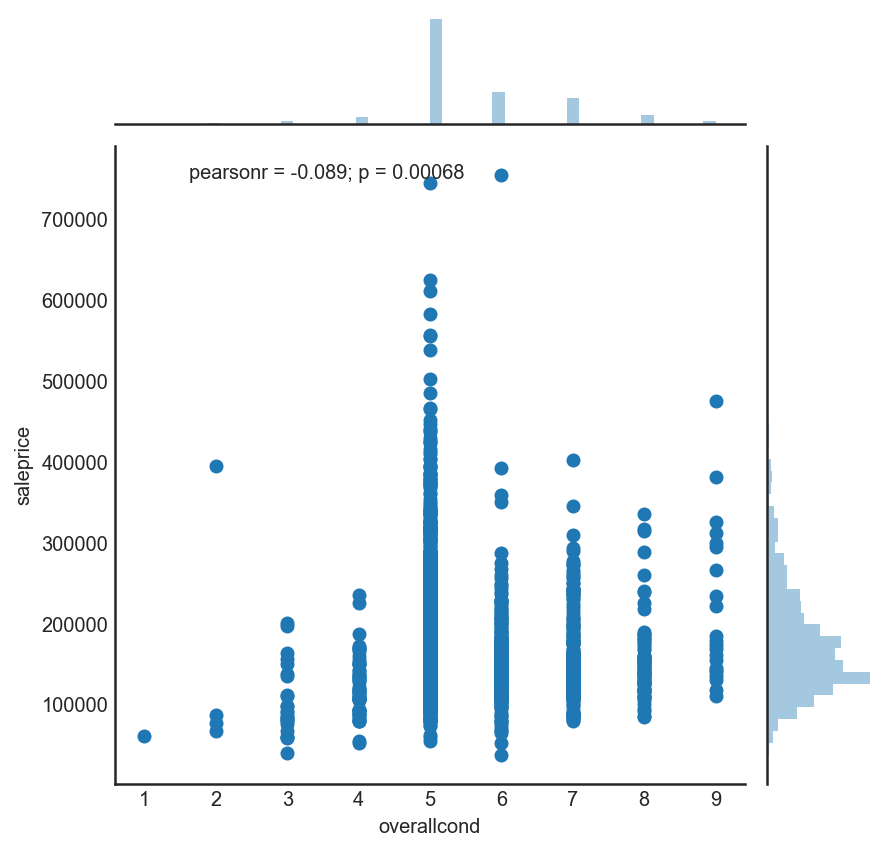

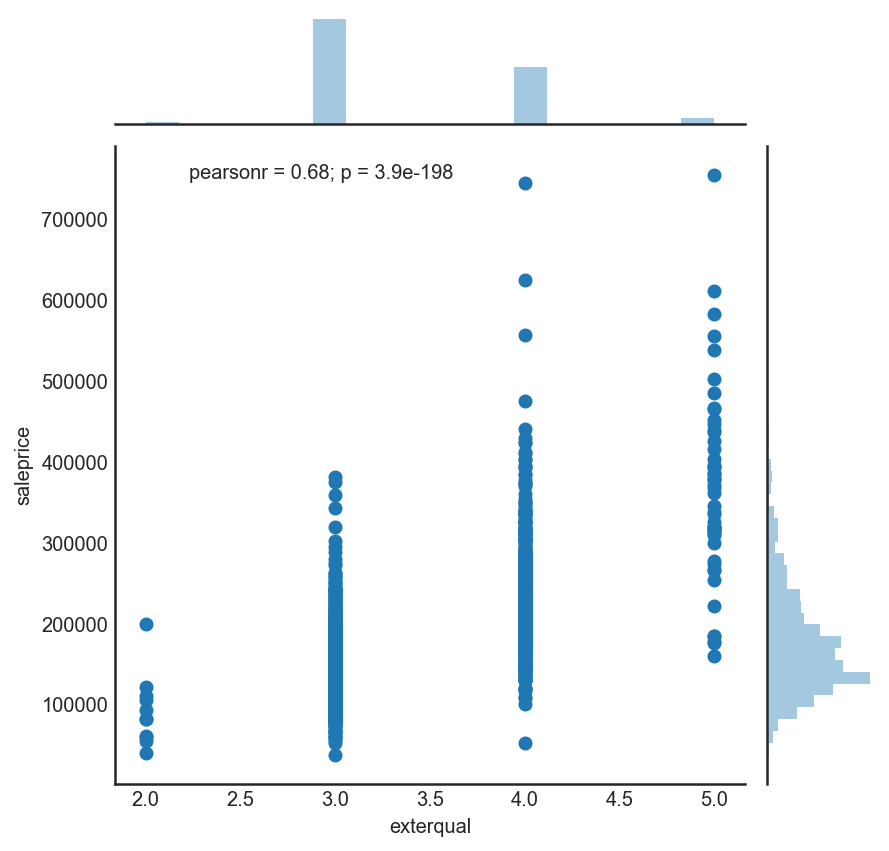

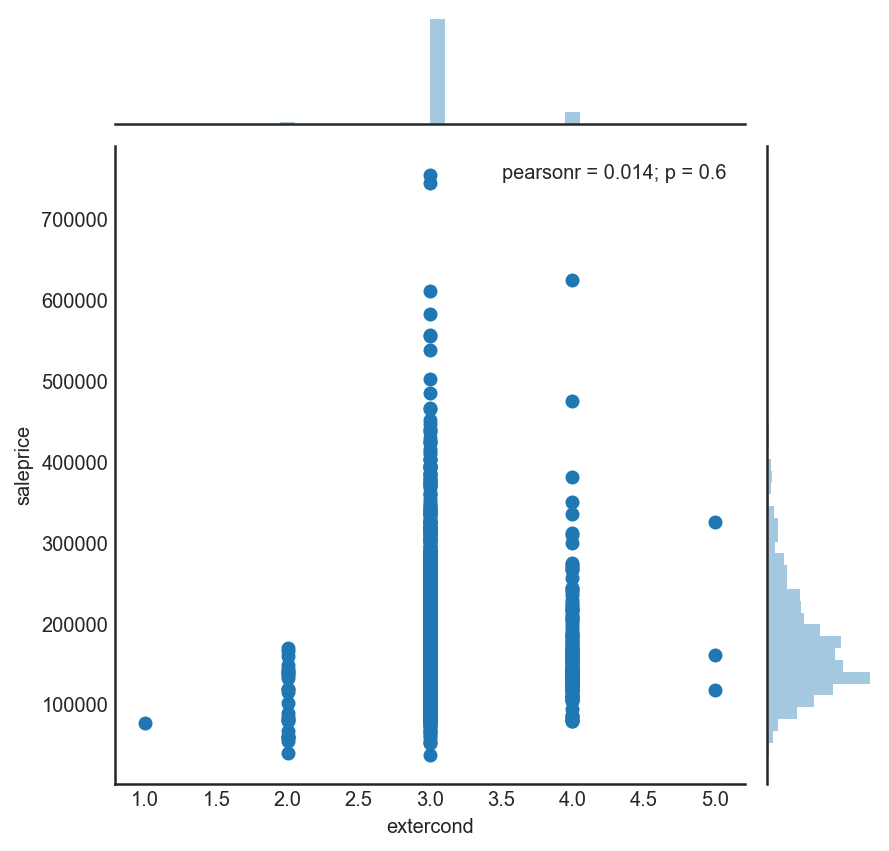

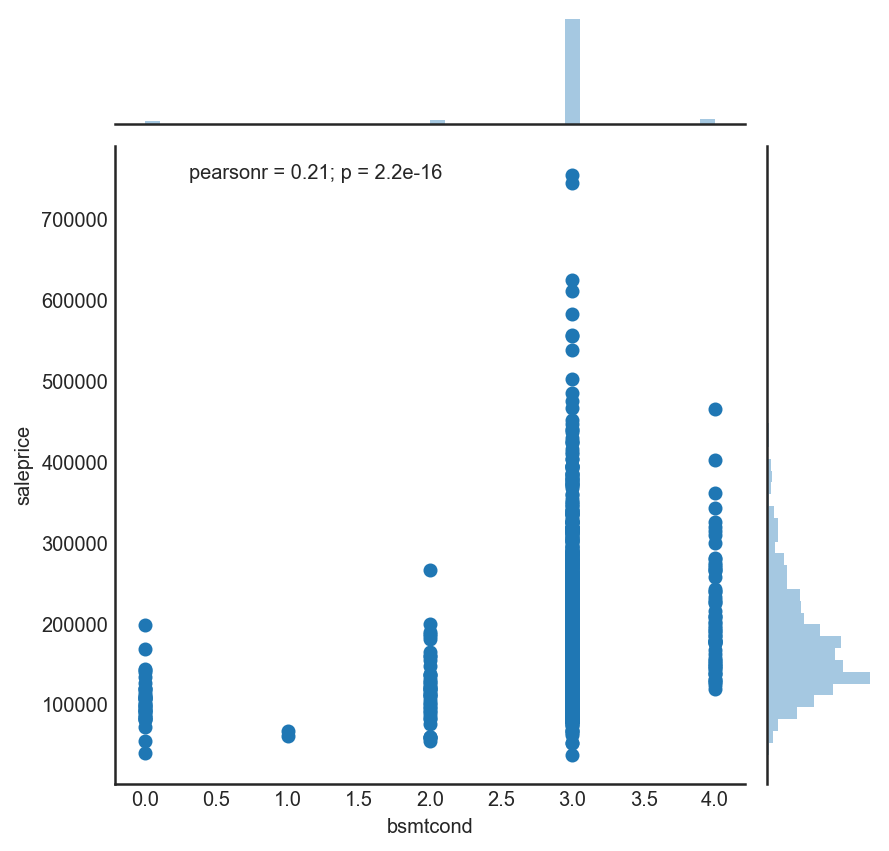

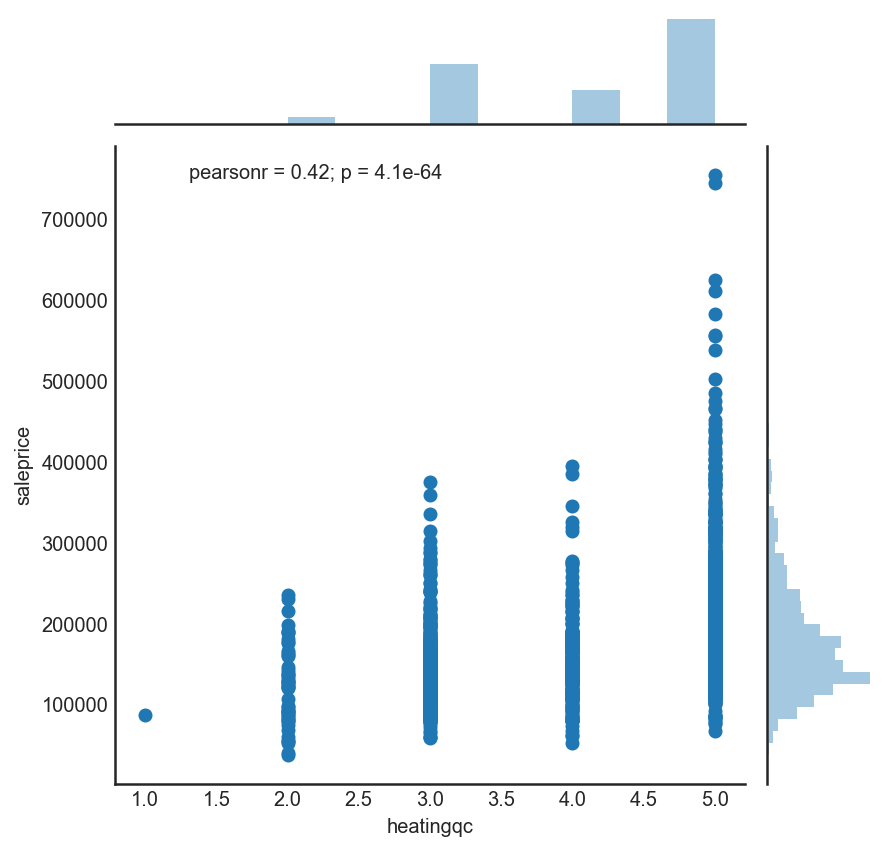

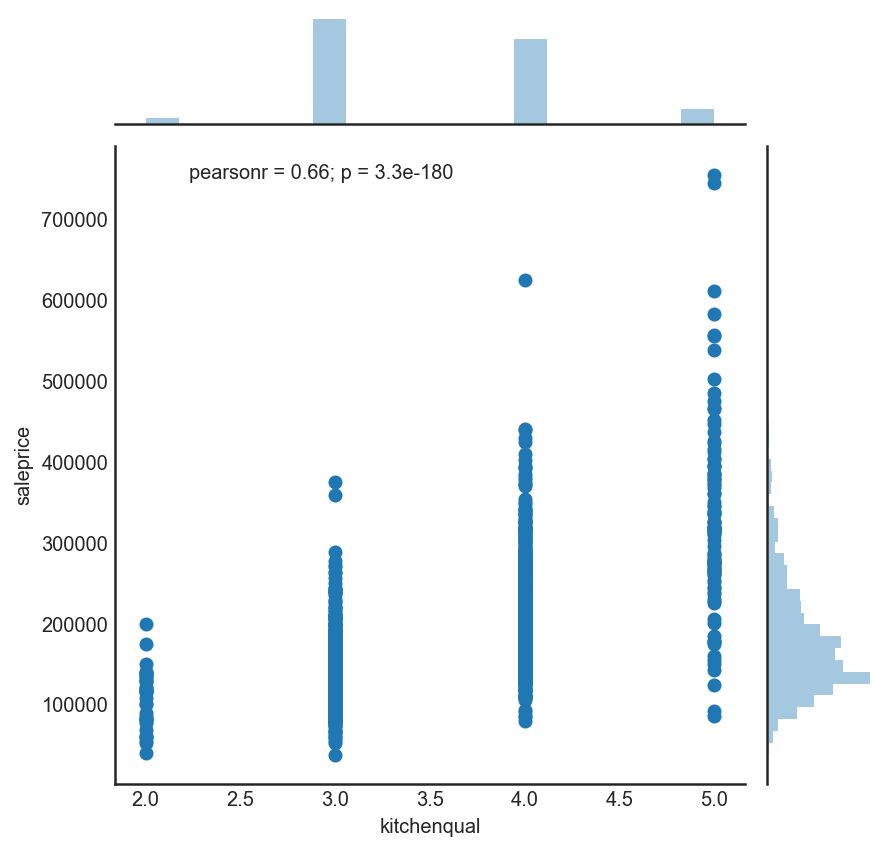

In [5]:
sns.jointplot(house['overallcond'],house['saleprice'])
sns.jointplot(house['exterqual'],house['saleprice'])
sns.jointplot(house['extercond'],house['saleprice'])
sns.jointplot(house['bsmtcond'],house['saleprice'])
sns.jointplot(house['heatingqc'],house['saleprice'])
sns.jointplot(house['kitchenqual'],house['saleprice'])
plt.show()

# plots indicate that the identified factors do impact saleprice

In [6]:
# drop duplicated eg yearbuilt which is replaced by age, or not needed
house.drop(['id','saletype','salecondition','yearbuilt','yearremodadd','saletype','salecondition'], axis=1, inplace=True)


In [7]:
# Create df for the non numeric features
obj_df = house.select_dtypes(include=['object']).copy()
col = list(obj_df.columns)
print col

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'foundation', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'centralair', 'electrical', 'functional', 'garagetype', 'garagefinish', 'paveddrive', 'poolqc', 'fence', 'miscfeature']


In [8]:
# binarize the non numeric features
dummy = pd.get_dummies(obj_df, columns=col, 
               prefix = col, drop_first=True)
dummy.head(2)


,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No,garagefinish_No,garagefinish_RFn,garagefinish_Unf,paveddrive_P,paveddrive_Y,poolqc_Fa,poolqc_Gd,poolqc_No,fence_GdWo,fence_MnPrv,fence_MnWw,fence_No,miscfeature_No,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC
0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [9]:
house_reno = pd.concat([house,dummy],axis=1)


In [10]:
house_reno.drop(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'foundation', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'centralair', 'electrical', 'functional', 'garagetype', 'garagefinish', 'paveddrive', 'poolqc', 'fence', 'miscfeature']
                , axis=1, inplace=True)
house_reno.head(2)

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,exterqual,extercond,bsmtqual,bsmtcond,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,age,remod_age,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No,garagefinish_No,garagefinish_RFn,garagefinish_Unf,paveddrive_P,paveddrive_Y,poolqc_Fa,poolqc_Gd,poolqc_No,fence_GdWo,fence_MnPrv,fence_MnWw,fence_No,miscfeature_No,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC
0,60,65.0,8450,7,5,4,3,4,3,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2,548,3,3,0,61,0,0,0,0,0,2,2008,208500,15,15,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,20,80.0,9600,6,8,3,3,4,3,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,2,460,3,3,298,0,0,0,0,0,0,5,2007,181500,42,42,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [11]:
house_reno_train = house_reno[house_reno.yrsold != 2010]
house_reno_test = house_reno[house_reno.yrsold == 2010]
y_train = house_reno_train['saleprice']
y_test = house_reno_test['saleprice']

house_reno_test.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,exterqual,extercond,bsmtqual,bsmtcond,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,age,remod_age,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No,garagefinish_No,garagefinish_RFn,garagefinish_Unf,paveddrive_P,paveddrive_Y,poolqc_Fa,poolqc_Gd,poolqc_No,fence_GdWo,fence_MnPrv,fence_MnWw,fence_No,miscfeature_No,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC
16,20,70.052897,11241,6,7,3,3,3,3,578,0,426,1004,5,1004,0,0,1004,1,0,1,0,2,1,3,5,1,3,2,480,3,3,0,0,0,0,0,0,700,3,2010,149000,48,48,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
24,20,70.052897,8246,5,8,3,4,3,3,188,668,204,1060,5,1060,0,0,1060,1,0,1,0,3,1,4,6,1,3,1,270,3,3,406,90,0,0,0,0,0,5,2010,154000,50,17,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [12]:
predictors = [c for c in house_reno.columns if c not in ['saleprice']]

In [13]:
#print predictors

In [14]:
X_train = house_reno_train[predictors].values
X_test = house_reno_test.loc[:,predictors]

# standardise the predictor matrix
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)
print Xs_train.std(), Xs_train.mean(),'\n'
print Xs_test.std(), Xs_test.mean(),'\n'



0.99760478698 7.57290298472e-17 

1.02729847007 0.00731925127232 



In [15]:
print Xs_test

[[-0.88080208  0.00847566  0.06547187 ..., -0.02798366  5.95938635
  -0.02798366]
 [-0.88080208  0.00847566 -0.22253166 ..., -0.02798366 -0.16780251
  -0.02798366]
 [-0.88080208 -0.44411949 -0.32311653 ..., -0.02798366 -0.16780251
  -0.02798366]
 ..., 
 [-0.88080208  0.68141467  0.25144811 ..., -0.02798366 -0.16780251
  -0.02798366]
 [ 0.31417144 -0.17399129 -0.14598715 ..., -0.02798366  5.95938635
  -0.02798366]
 [-0.88080208 -0.08394856 -0.08107817 ..., -0.02798366 -0.16780251
  -0.02798366]]


0.919029045893


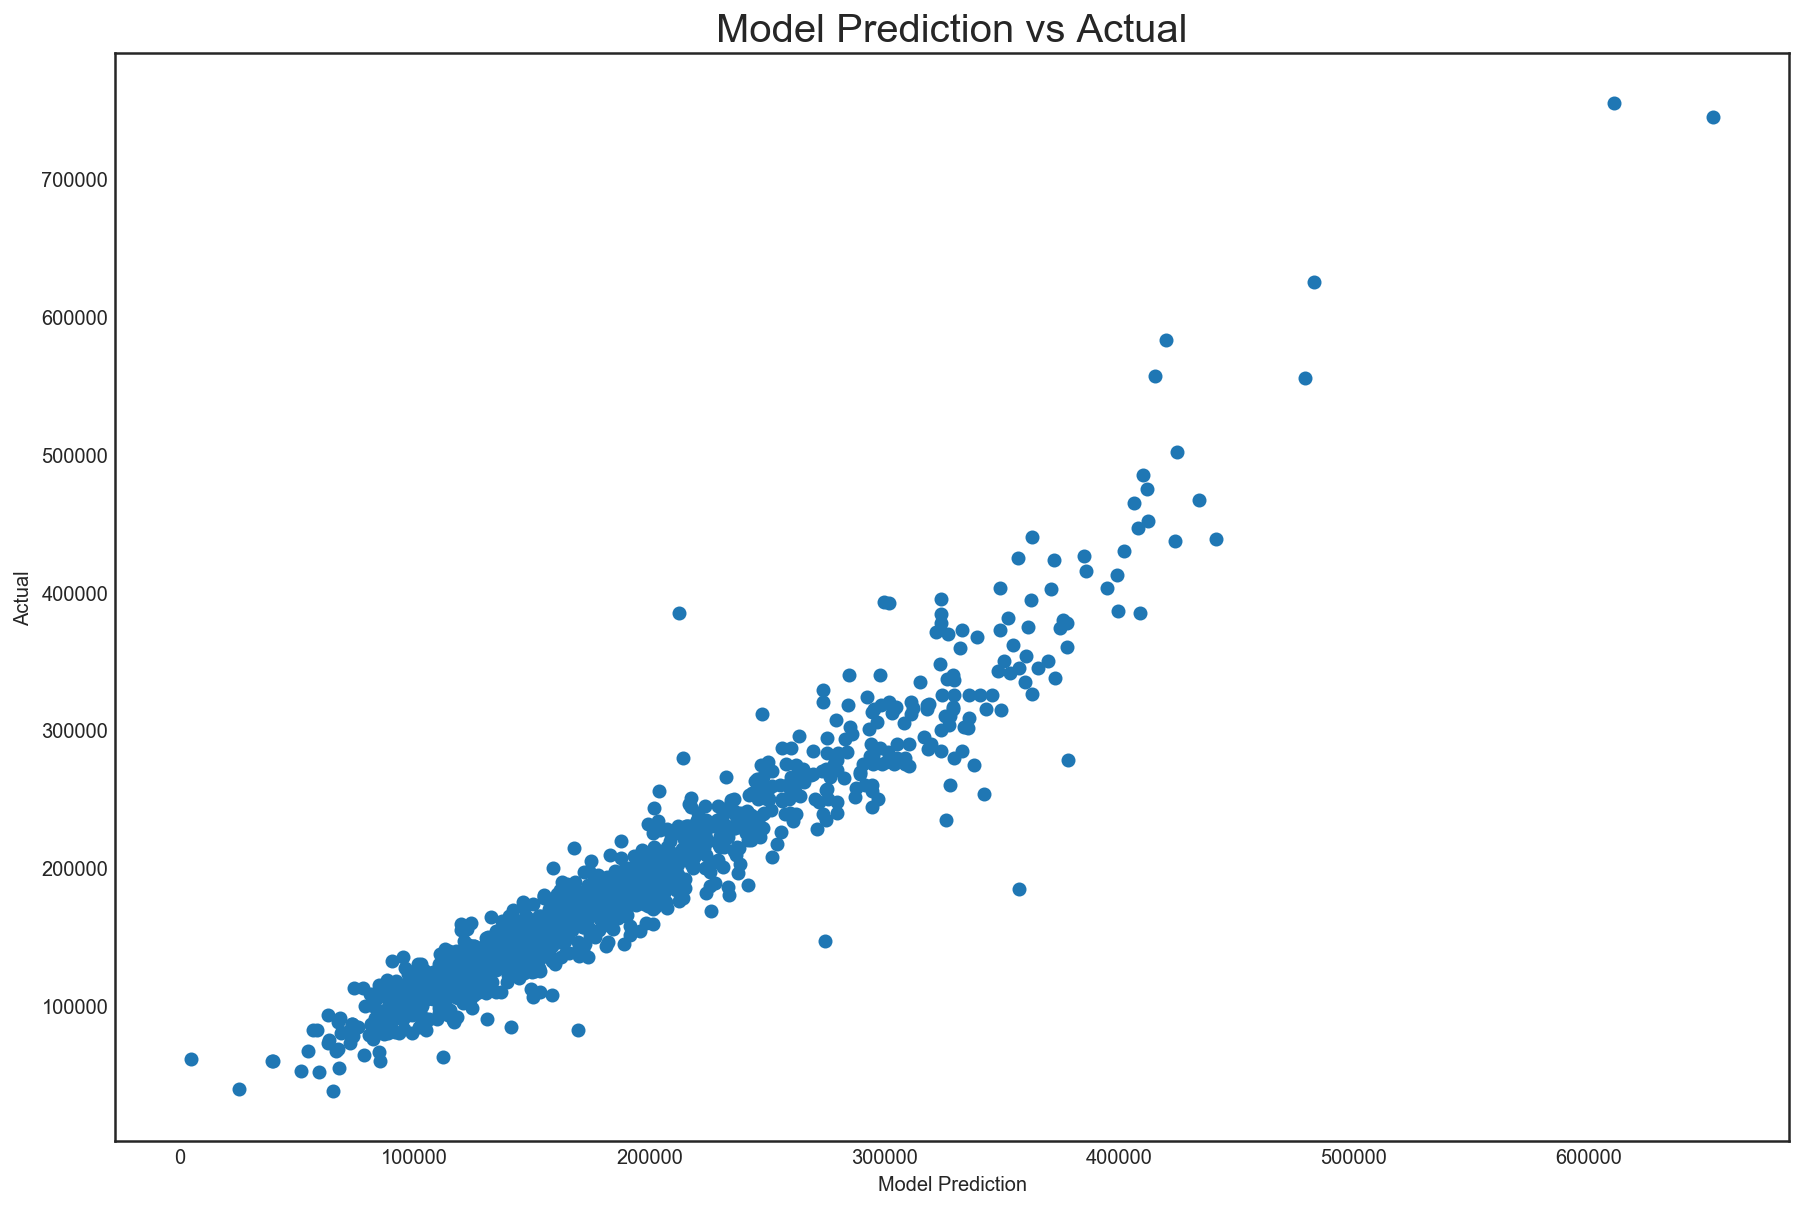

In [16]:
lm = linear_model.LinearRegression()
model = lm.fit(Xs_train,y_train)

predict = model.predict(Xs_train)
score = model.score(Xs_train,y_train)
print score

plt.figure(figsize=(15,10))
plt.scatter(predict, y_train)
plt.title('Model Prediction vs Actual', fontsize=20)
plt.xlabel ('Model Prediction')
plt.ylabel ('Actual')
plt.show()

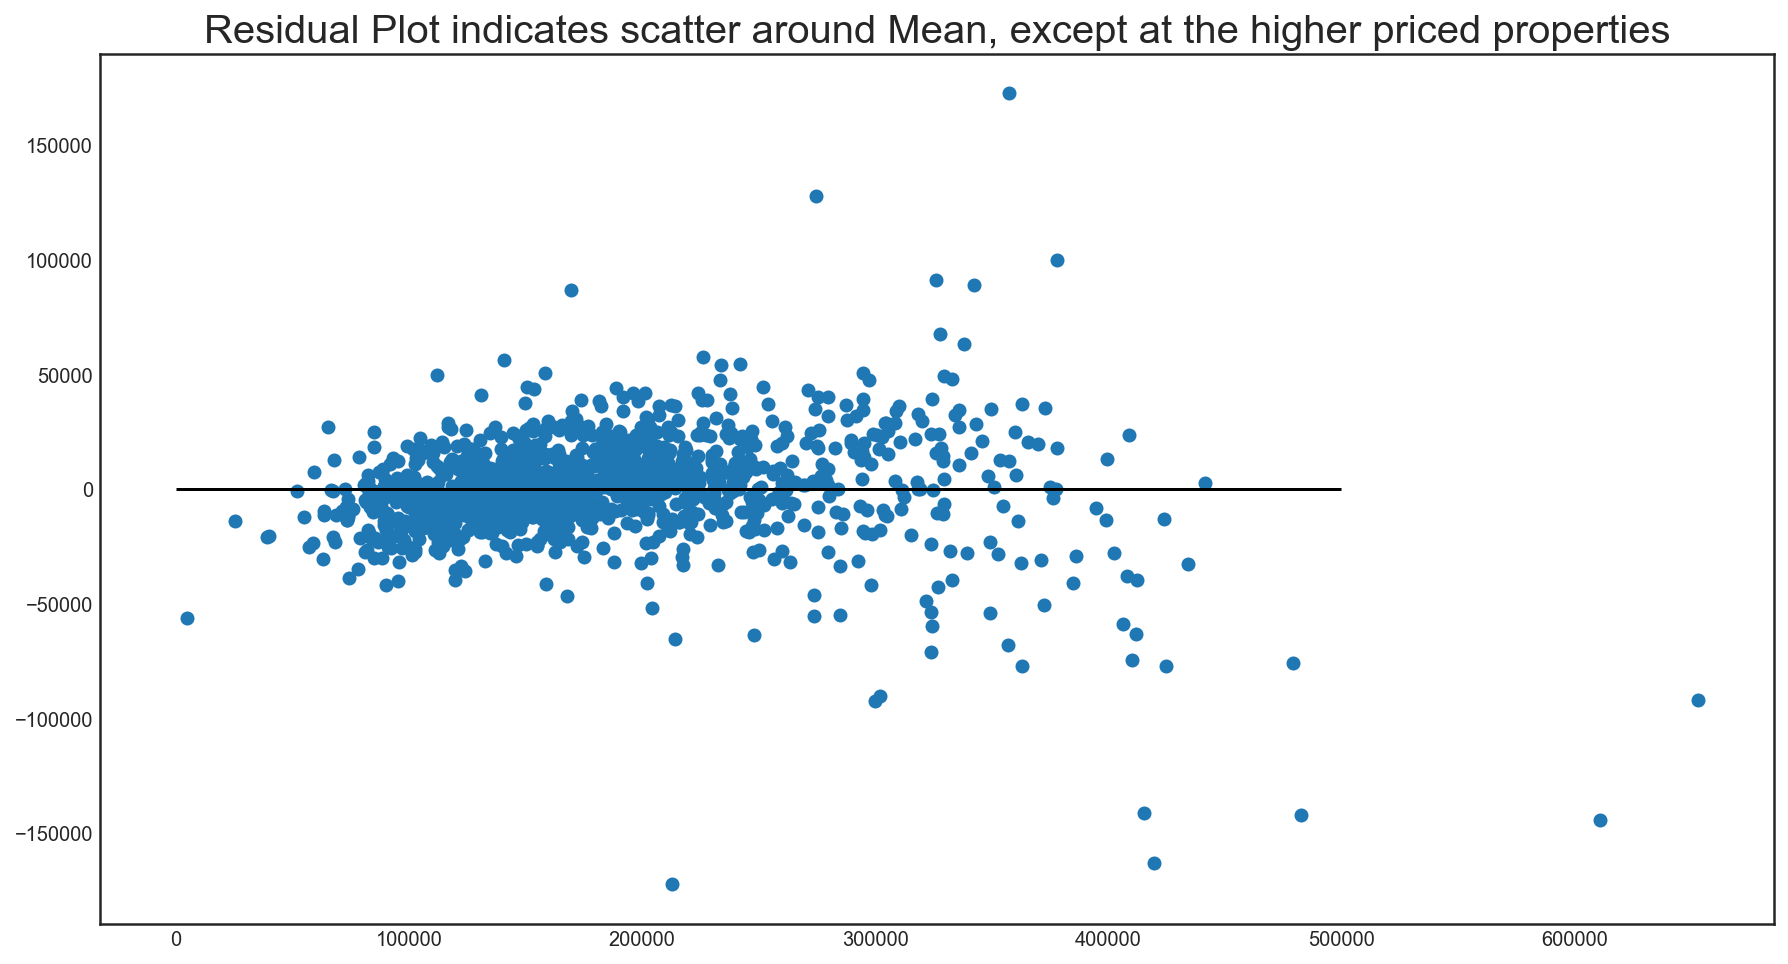

In [17]:
# Residual plot to check model
plt.figure(figsize=(15,8))
plt.title('Residual Plot indicates scatter around Mean, except at the higher priced properties', fontsize=20)
plt.scatter(model.predict(Xs_train),model.predict(Xs_train) - y_train)
plt.hlines(y=0, xmin=0,xmax= 500000)
plt.show()

In [18]:
# test model against 2010 data


-3.03458038668e+23


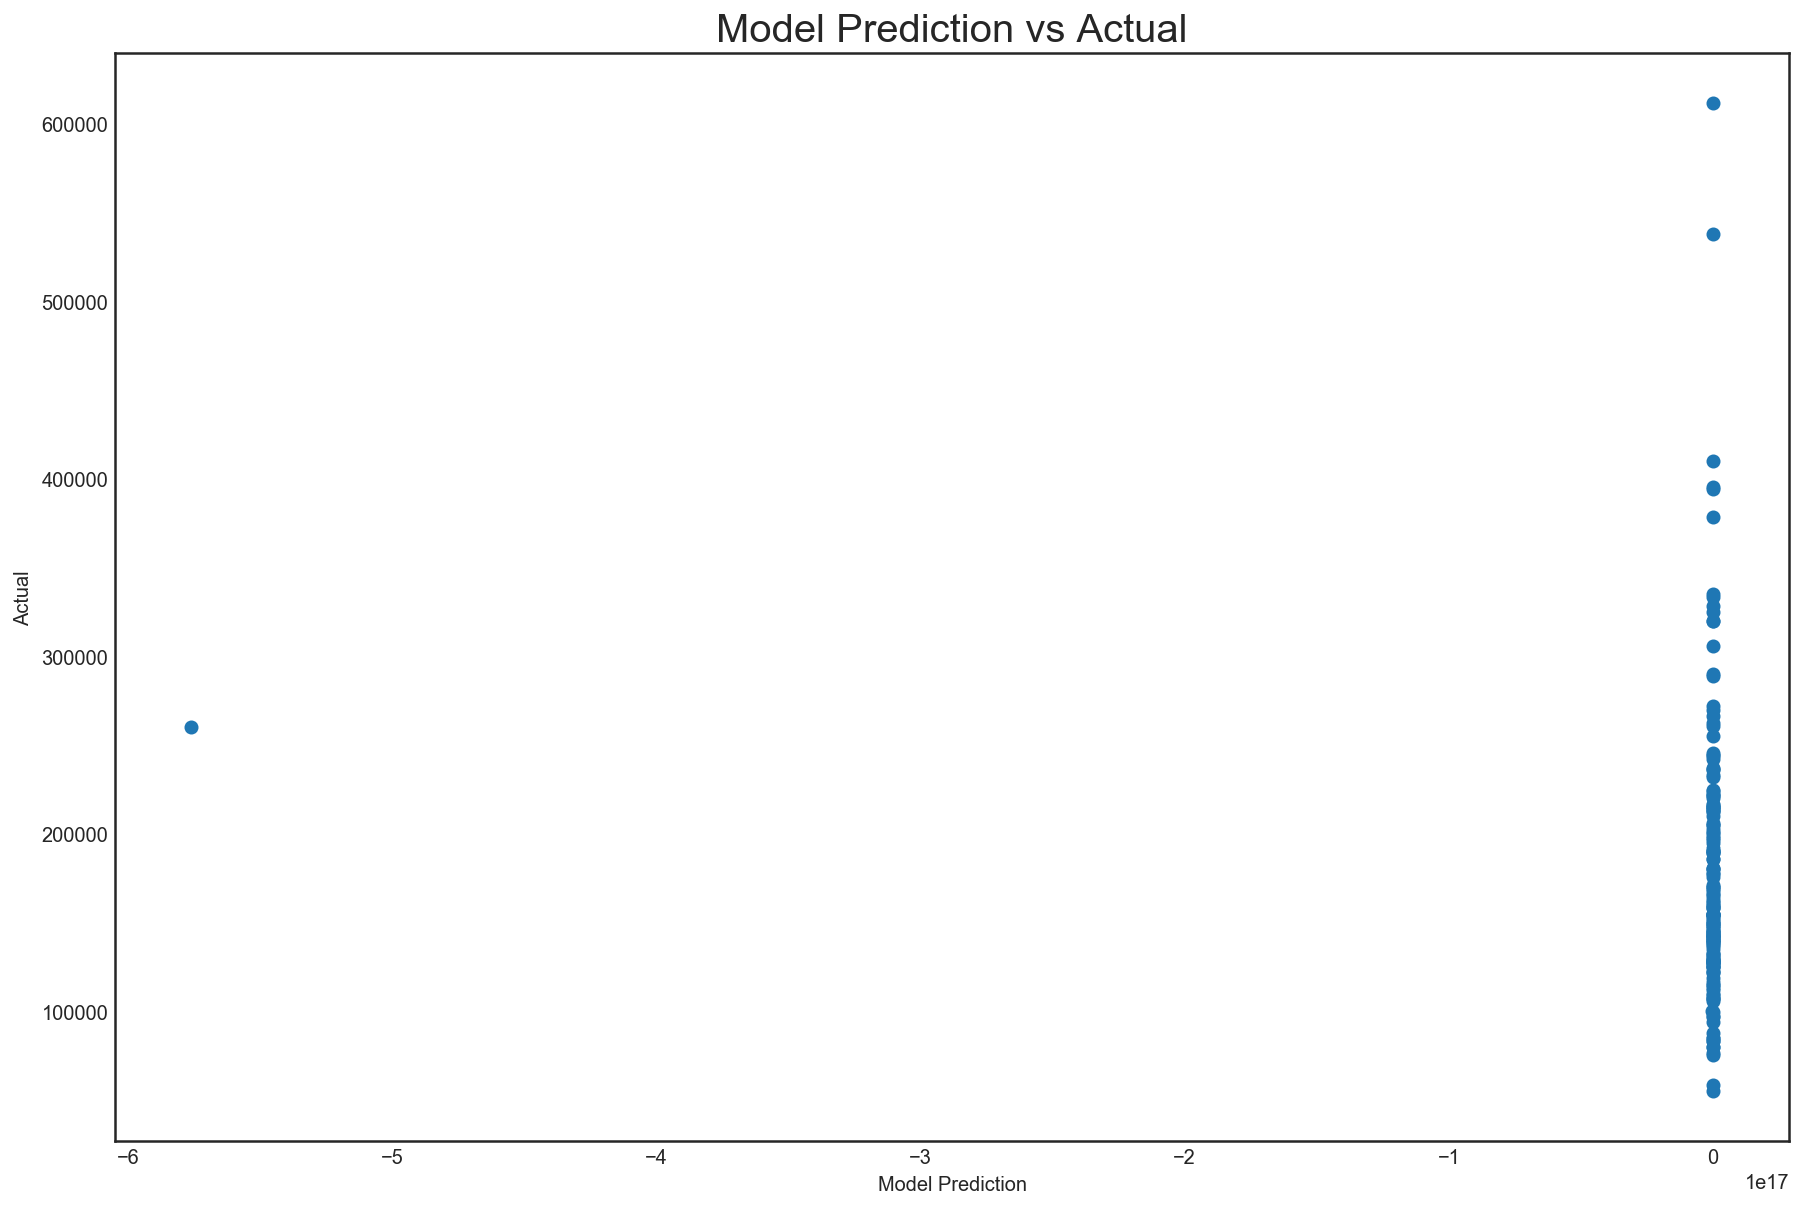

In [19]:
model = lm.fit(Xs_train,y_train)
y_predict = model.predict(Xs_test)
score = model.score(Xs_test,y_test)
print score

plt.figure(figsize=(15,10))
plt.scatter(y_predict, y_test)
plt.title('Model Prediction vs Actual', fontsize=20)
plt.xlabel ('Model Prediction')
plt.ylabel ('Actual')
plt.show()

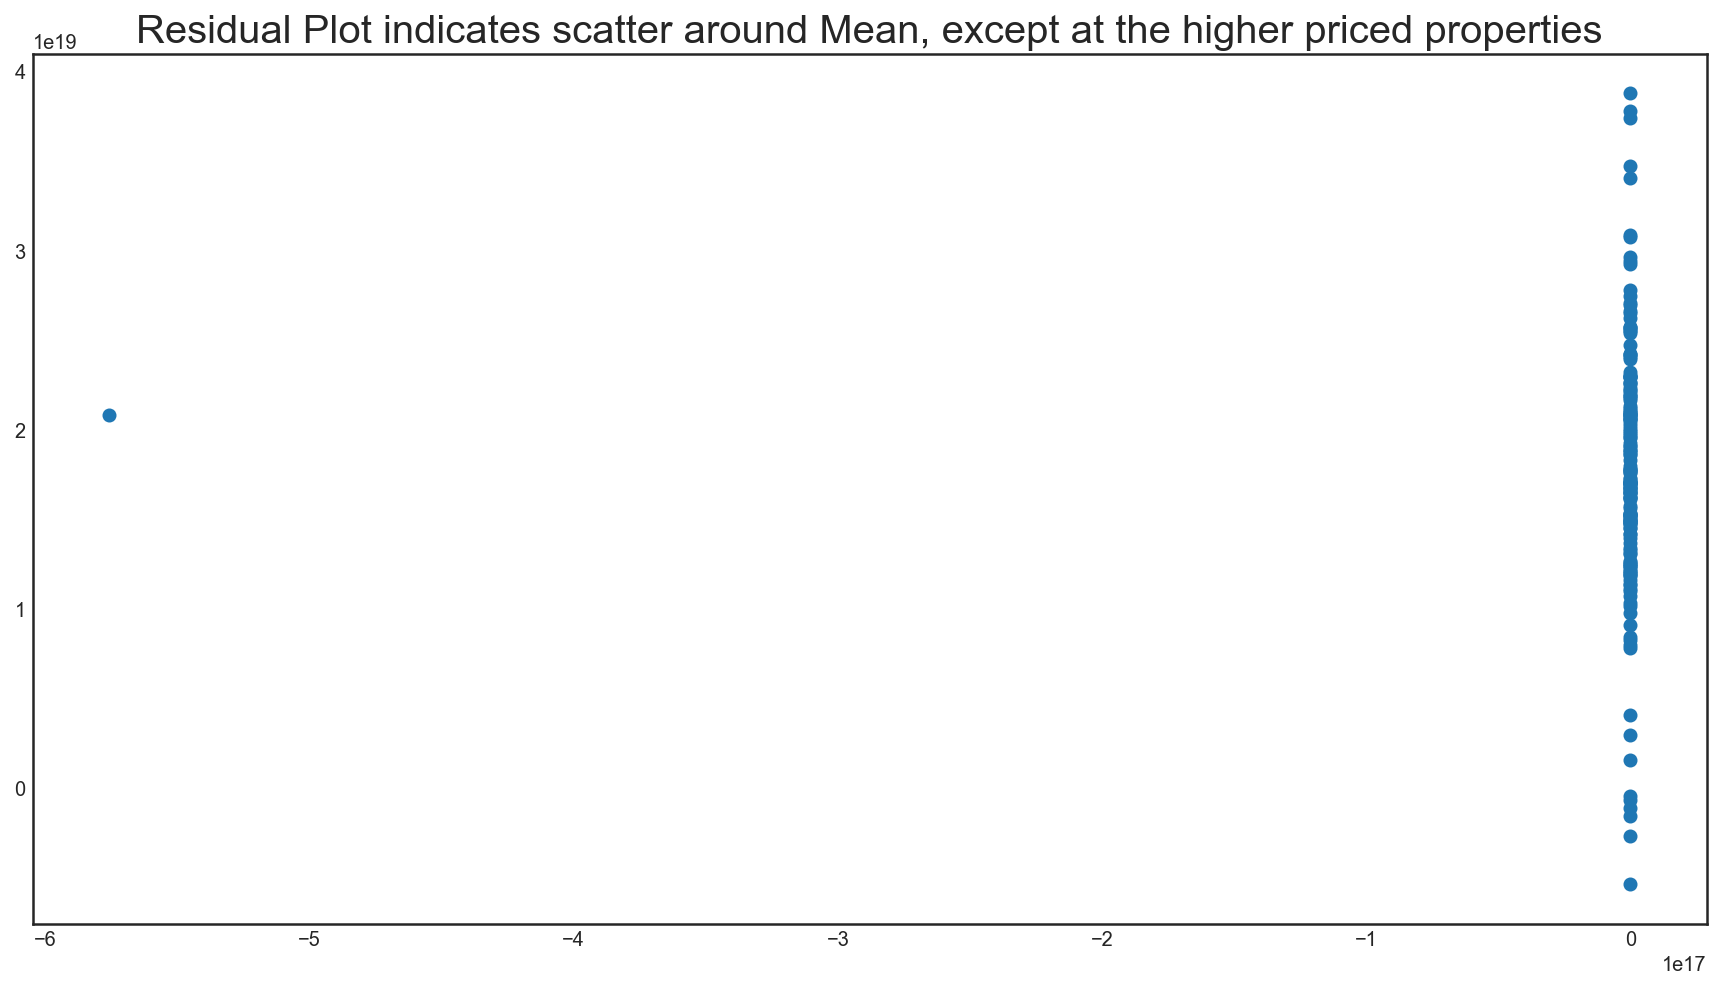

In [21]:
# Residual plot
plt.figure(figsize=(15,8))
plt.title('Residual Plot indicates scatter around Mean, except at the higher priced properties', fontsize=20)
plt.scatter(model.predict(Xs_test),model.predict(X_test) - y_test)
plt.hlines(y=0, xmin=0,xmax= 500000)
plt.show()

## Stats Model 

In [23]:
# using the stats model 

import statsmodels.api as sm
y = y_train
X = Xs_train
model2=sm.OLS(y,X).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.9047
Date:                Thu, 05 Apr 2018   Prob (F-statistic):              0.813
Time:                        16:39:30   Log-Likelihood:                -17302.
No. Observations:                1278   AIC:                         3.501e+04
Df Residuals:                    1075   BIC:                         3.606e+04
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4872.4938   3.09e+04     -0.157      0.875   -6.56e+04    5.59e+04
x2          1052.9377   9061.844      0.116      0.908   -1.67e+04    1.88e+04
x3          5507.4565   9978.860      0.552      0.581   -1.41e+04    2.51e+04
x4          1.093e+04   1.31e+04      0.837      0.403   -1.47e+04    3.65e+04
x5          6436.0011   8812.614      0.730      0.465   -1.09e+04    2.37e+04
x6          2597.7301   1.12e+04      0.232      0.817   -1.94e+04    2.46e+04
x7         -1352.6027   6820.919     -0.198      0.843   -1.47e+04     1.2e+04
x8          5317.3862    1.5e+04      0.354      0.723   -2.41e+04    3.48e+04
x9         -1142.9000   1.27e+04     -0.090      0.928    -2.6e+04    2.37e+04
x10         8686.5441   9923.351      0.875      0.382   -1.08e+04    2.82e+04
x11         1902.3261   1.18e+04      0.161      0.872   -2.13e+04    2.51e+04
x12          253.2304   8618.894      0.029      0.977   -1.67e+04    1.72e+04
x13         9944.4139   1.38e+04      0.720      0.471   -1.71e+04     3.7e+04
x14         1415.8054   8570.669      0.165      0.869   -1.54e+04    1.82e+04
x15         5127.2384   1.54e+04      0.333      0.739   -2.51e+04    3.53e+04
x16         1.498e+04   1.54e+04      0.974      0.330   -1.52e+04    4.52e+04
x17        -1544.9378   8568.035     -0.180      0.857   -1.84e+04    1.53e+04
x18         1.604e+04    1.2e+04      1.336      0.182   -7509.659    3.96e+04
x19          504.7519   9612.663      0.053      0.958   -1.84e+04    1.94e+04
x20          553.2015   6776.989      0.082      0.935   -1.27e+04    1.39e+04
x21         2257.6986   1.14e+04      0.199      0.843   -2.01e+04    2.46e+04
x22         2307.8107      1e+04      0.230      0.818   -1.74e+04     2.2e+04
x23        -4110.2813   1.04e+04     -0.396      0.692   -2.45e+04    1.63e+04
x24        -2751.3752   1.12e+04     -0.246      0.805   -2.47e+04    1.92e+04
x25         4017.8367   1.01e+04      0.396      0.692   -1.59e+04    2.39e+04
x26         4246.3662   1.45e+04      0.294      0.769   -2.41e+04    3.26e+04
x27         3523.7972   1.34e+04      0.262      0.793   -2.28e+04    2.99e+04
x28        -1956.5027   1.37e+04     -0.143      0.886   -2.87e+04    2.48e+04
x29         2528.9349   1.57e+04      0.161      0.872   -2.82e+04    3.33e+04
x30         4664.6763   1.53e+04      0.305      0.761   -2.54e+04    3.47e+04
x31         5620.5731   2.42e+04      0.232      0.816   -4.18e+04    5.31e+04
x32        -3598.6939   2.55e+04     -0.141      0.888   -5.36e+04    4.64e+04
x33         1139.5552   6997.397      0.163      0.871   -1.26e+04    1.49e+04
x34          764.7149   7312.370      0.105      0.917   -1.36e+04    1.51e+04
x35         -675.2826   7238.891     -0.093      0.926   -1.49e+04    1.35e+04
x36         1212.6695   6213.174      0.195      0.845    -1.1e+04    1.34e+04
x3

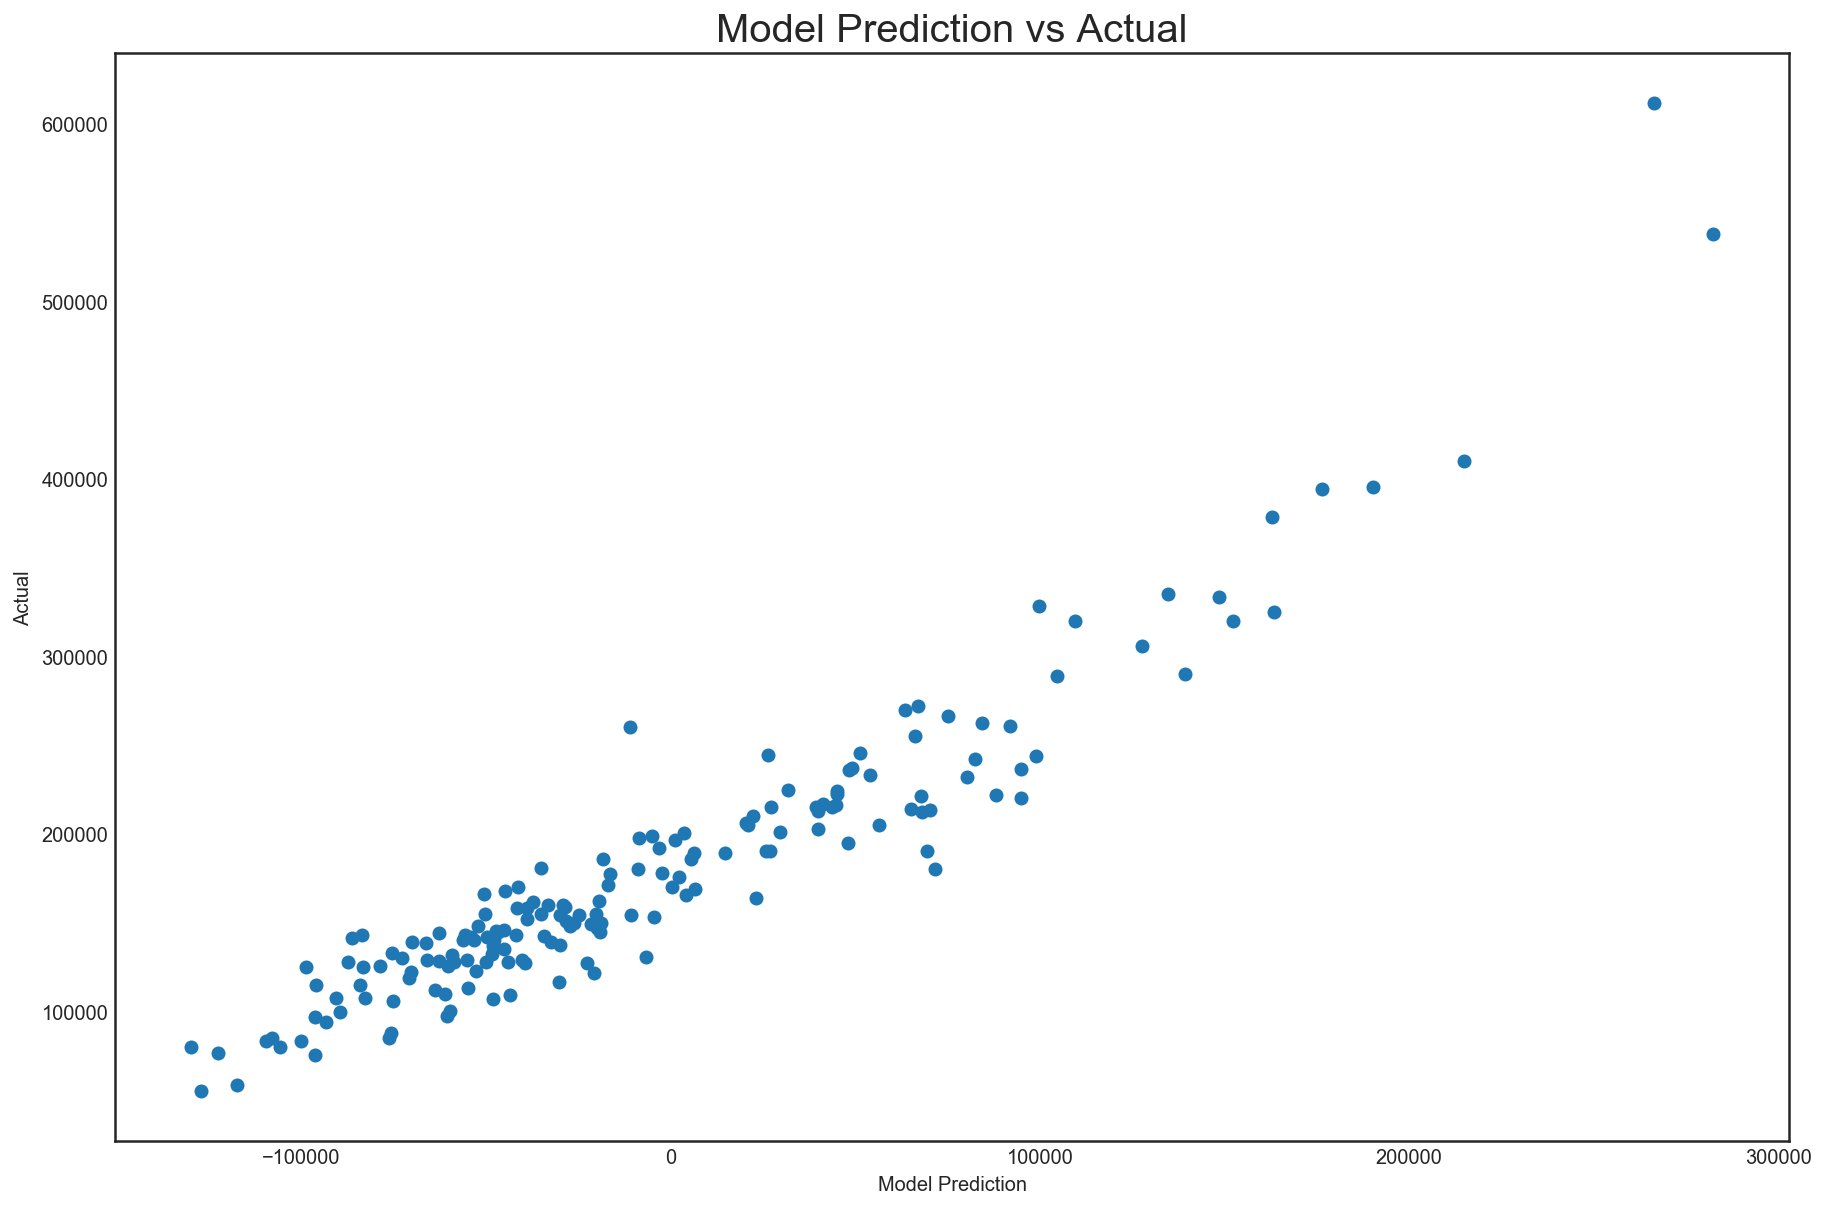

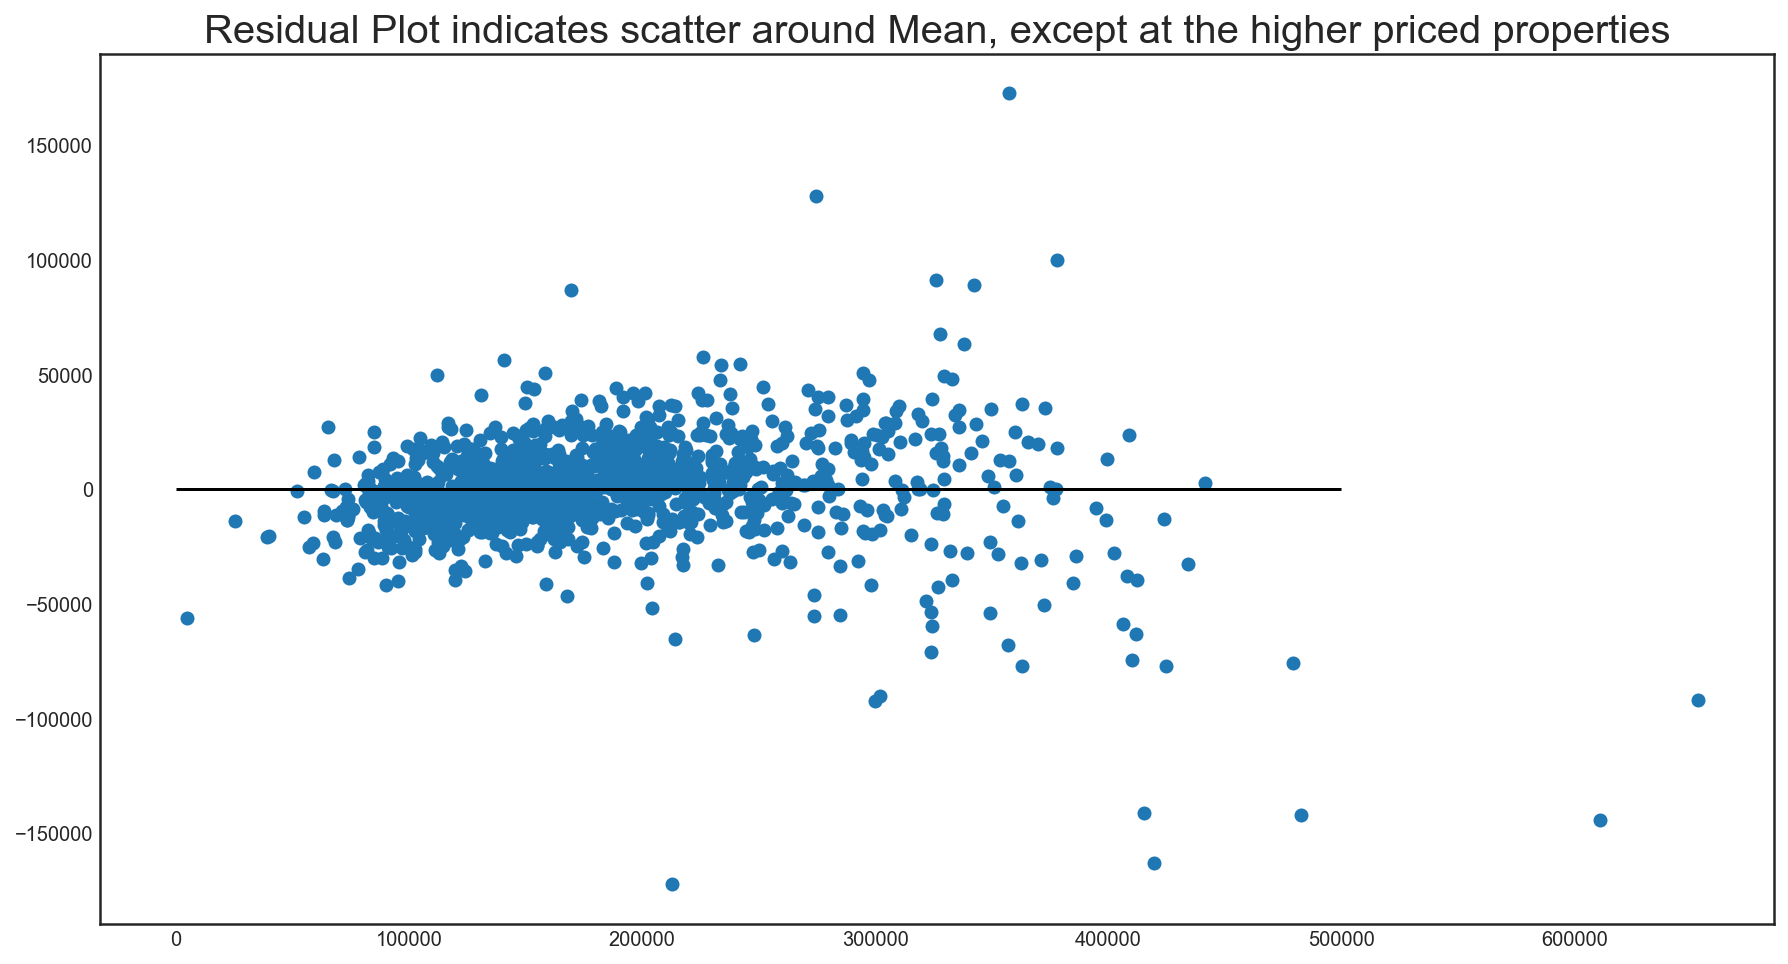

In [30]:
# Residual plot to check model
plt.figure(figsize=(15,8))
plt.title('Residual Plot indicates scatter around Mean, except at the higher priced properties', fontsize=20)
plt.scatter(model.predict(Xs_train),model.predict(Xs_train) - y_train)
plt.hlines(y=0, xmin=0,xmax= 500000)
plt.show()

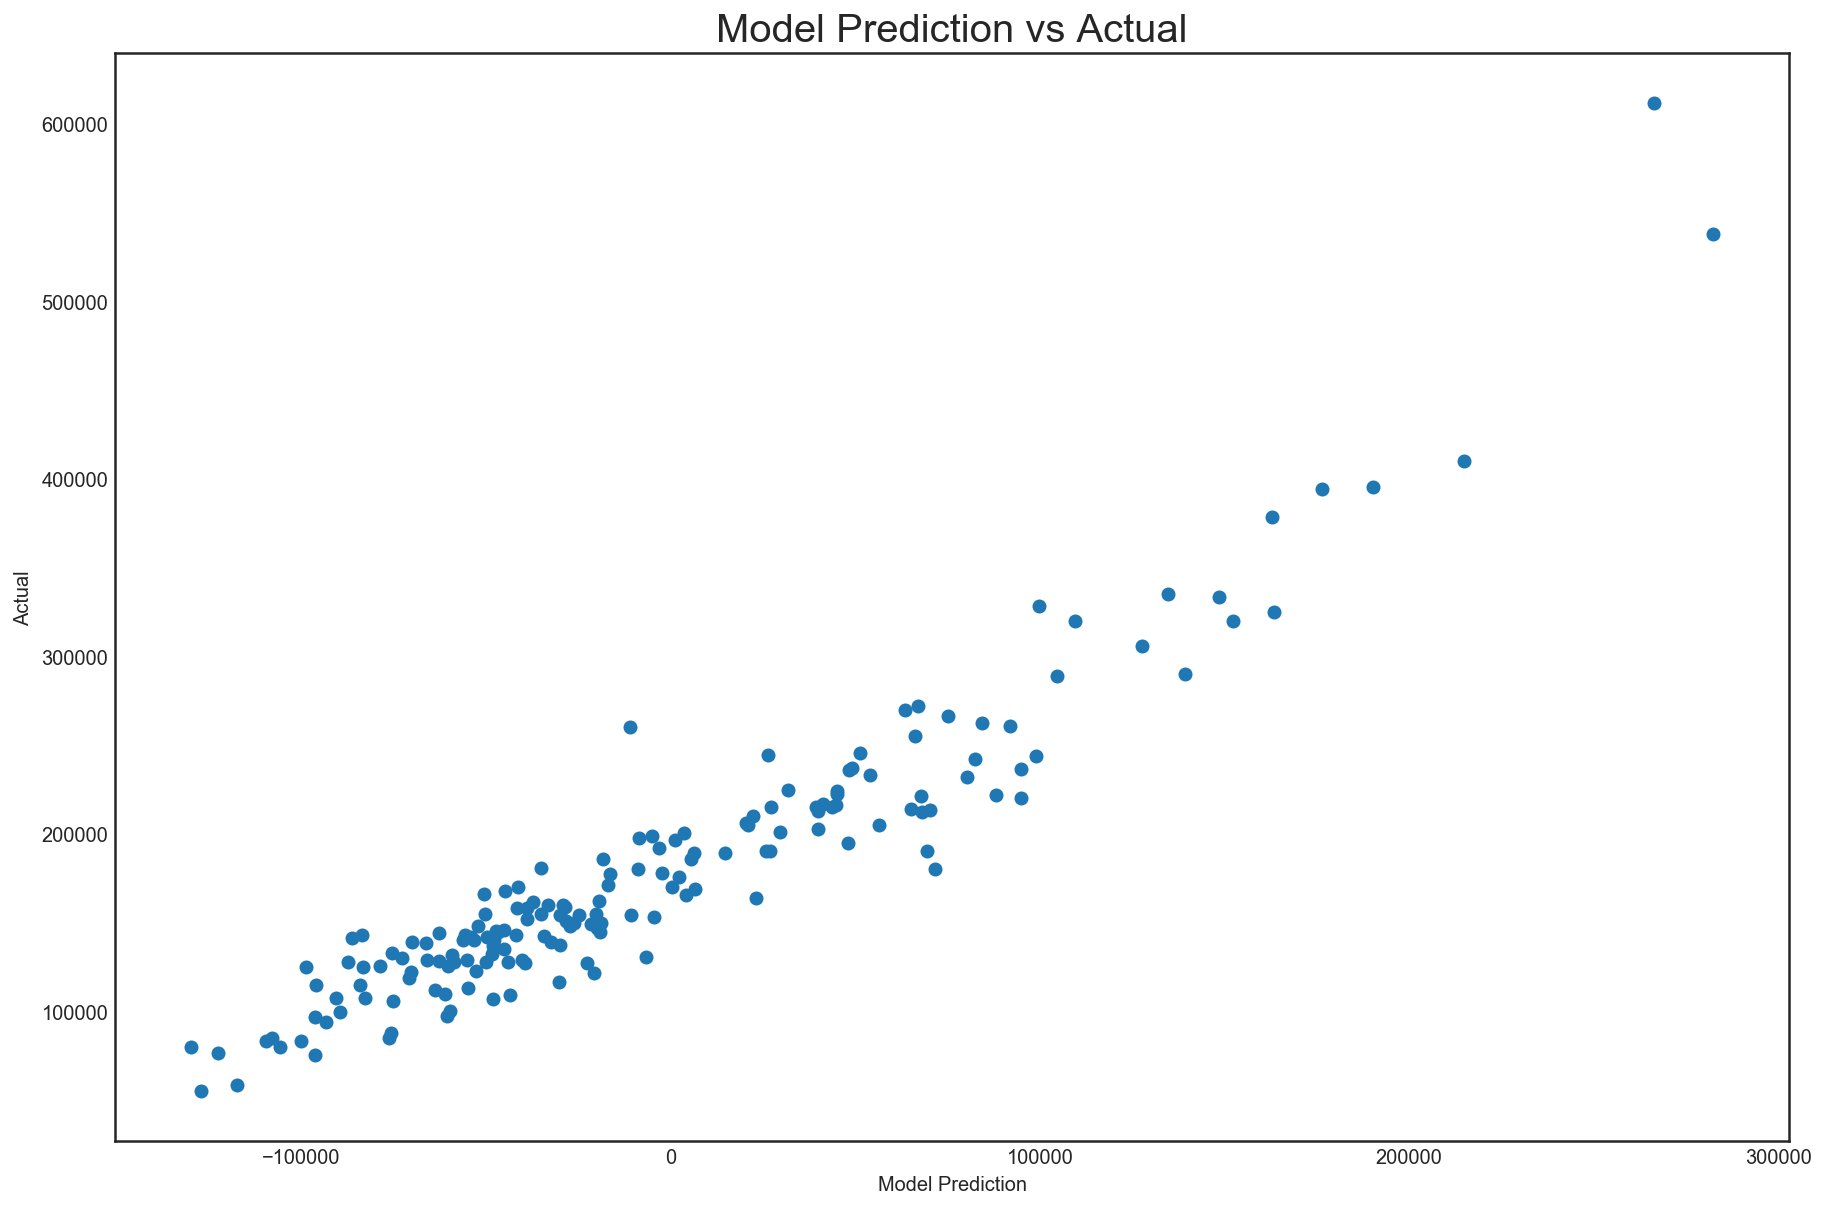

In [31]:
y_predict = model2.predict(Xs_test)

plt.figure(figsize=(15,10))
plt.scatter(y_predict, y_test)
plt.title('Model Prediction vs Actual', fontsize=20)
plt.xlabel ('Model Prediction')
plt.ylabel ('Actual')
plt.show()

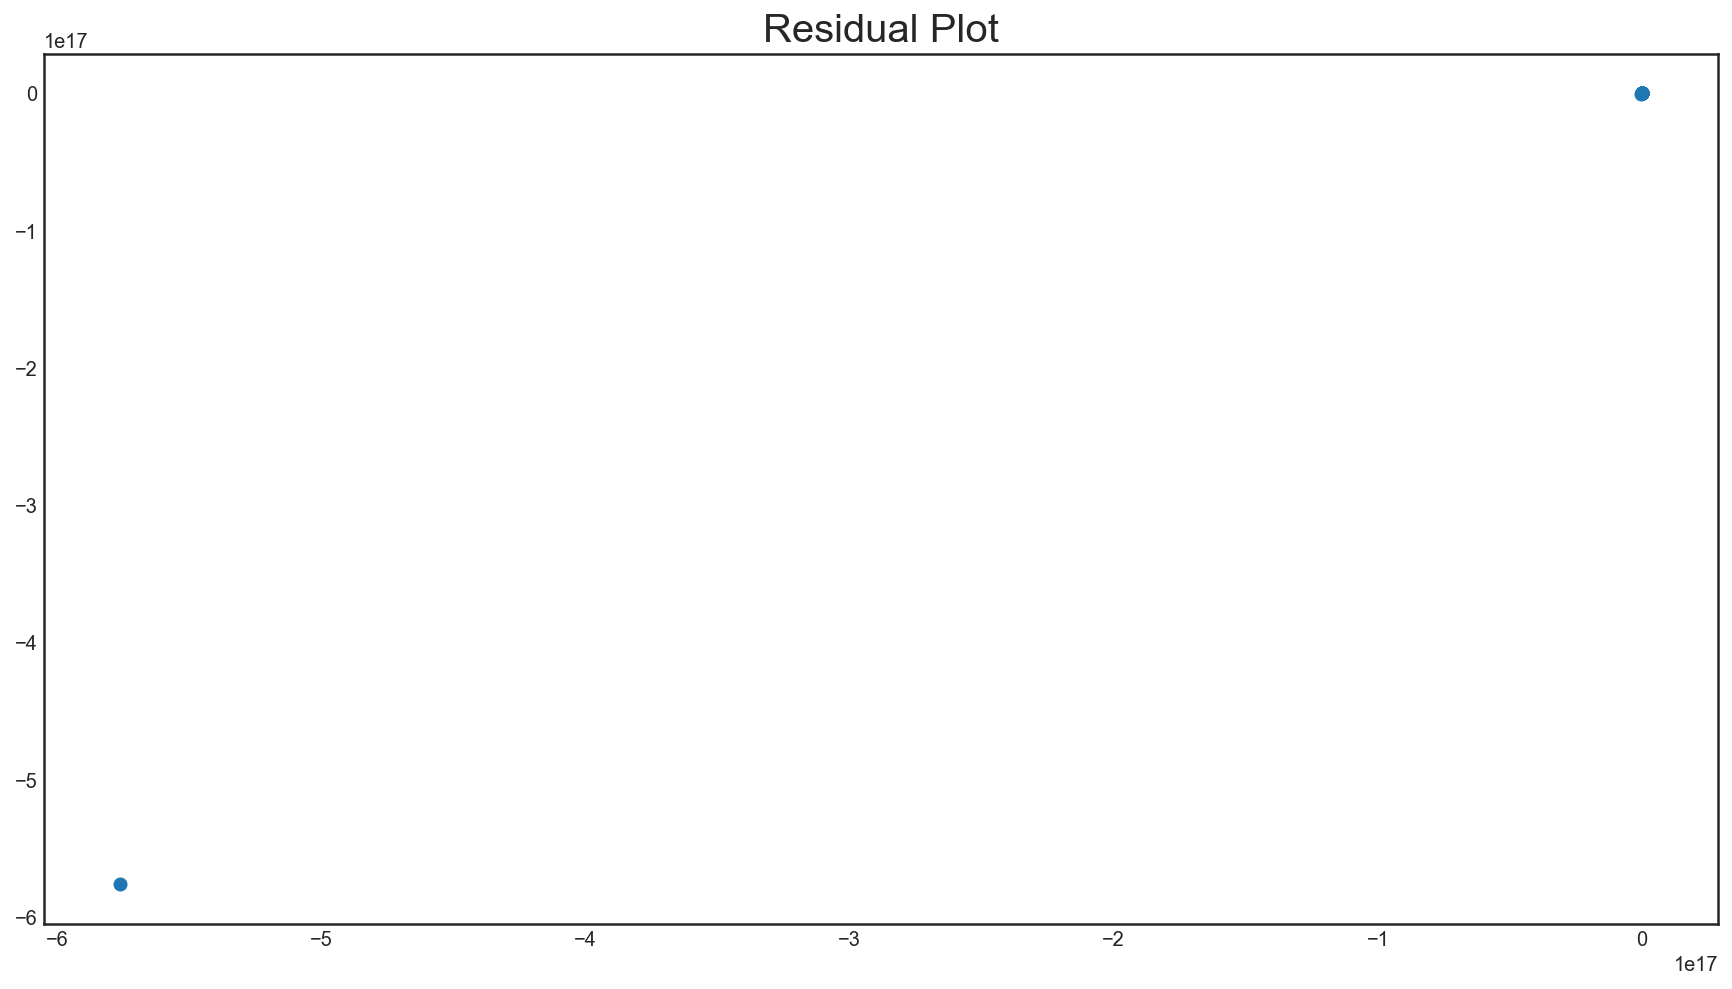

In [34]:
# Residual plot to check model
plt.figure(figsize=(15,8))
plt.title('Residual Plot', fontsize=20)
plt.scatter(model.predict(Xs_test),model.predict(Xs_test) - y_test)
plt.hlines(y=0, xmin=0,xmax= 500000)
plt.show()